In [241]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import openpyxl
import numpy as np
from matplotlib.cm import get_cmap
import geopandas as gpd
import pydeck as pdk


In [64]:
# Nom de fichier local à charger si l'URL n'est pas disponible
filename = "/Users/nelson/Desktop/BI/data/Base_open_data_23.xlsx"

try:
    url = "https://www.data.gouv.fr/fr/datasets/r/cf654bbd-aa1e-458c-9d08-24252f66f16b"
    # Vérifier si l'URL est disponible
    urllib.request.urlopen(url)
    # Si l'URL est disponible, charger le contenu du fichier Excel
    data = pd.read_excel(url, sheet_name="BMO_2023_open_data")
    
except urllib.error.URLError:
    # Si l'URL n'est pas disponible, charger le contenu du fichier local
    data = pd.read_excel(filename, sheet_name="BMO_2023_open_data")

# Faire quelque chose avec le contenu (par exemple, l'imprimer)
data.head()


,annee,Code métier BMO,Nom métier BMO,Famille_met,Lbl_fam_met,BE23,NOMBE23,Dept,NomDept,REG,NOM_REG,met,xmet,smet
0,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,250,58,47
1,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,174,114,132
2,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,103,BASSIN MARIE-GALANTE,971,Guadeloupe,1,Guadeloupe,*,*,*
3,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,104,BASSIN ILES DU NORD,971,Guadeloupe,1,Guadeloupe,32,*,16
4,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,105,BASSIN CENTRE,971,Guadeloupe,1,Guadeloupe,65,50,*


Étape de data Cleaning

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50437 entries, 0 to 50436
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   annee            50437 non-null  int64 
 1   Code métier BMO  50437 non-null  object
 2   Nom métier BMO   50437 non-null  object
 3   Famille_met      50437 non-null  object
 4   Lbl_fam_met      50437 non-null  object
 5   BE23             50437 non-null  int64 
 6   NOMBE23          50437 non-null  object
 7   Dept             50437 non-null  object
 8   NomDept          50437 non-null  object
 9   REG              50437 non-null  int64 
 10  NOM_REG          50437 non-null  object
 11  met              50437 non-null  object
 12  xmet             50437 non-null  object
 13  smet             50437 non-null  object
dtypes: int64(3), object(11)
memory usage: 5.4+ MB


In [66]:
data.rename(columns={
    'annee': 'Année',
    'Code métier BMO': 'Code Métier BMO',
    'Nom métier BMO': 'Nom Métier BMO',
    'Famille_met': 'Code Famille Métier',
    'Lbl_fam_met': 'Label Famille Métier',
    'BE23': 'Code bassin emploi',
    'NOMBE23': 'Nom du bassin emploi',
    'Dept': 'Numero de Département',
    'NomDept': 'Nom du Département',
    'REG': 'code région INSEE',
    'NOM_REG': 'Nom de la Région',
    'met': 'Nombre de projet de recrutement',
    'xmet': 'Nombre de projet de recrutement jugés difficile',
    'smet': 'Nombre de projet de recrutement saisonniers'
}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50437 entries, 0 to 50436
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Année                                            50437 non-null  int64 
 1   Code Métier BMO                                  50437 non-null  object
 2   Nom Métier BMO                                   50437 non-null  object
 3   Code Famille Métier                              50437 non-null  object
 4   Label Famille Métier                             50437 non-null  object
 5   Code bassin emploi                               50437 non-null  int64 
 6   Nom du bassin emploi                             50437 non-null  object
 7   Numero de Département                            50437 non-null  object
 8   Nom du Département                               50437 non-null  object
 9   code région INSEE                      

In [59]:
data.head()

,Année,Code Métier BMO,Nom Métier BMO,Code Famille Métier,Label Famille Métier,Code bassin emploi,Nom du bassin emploi,Numero de Département,Nom du Département,code région INSEE,Nom de la Région,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
0,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,250,58,47
1,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,174,114,132
2,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,103,BASSIN MARIE-GALANTE,971,Guadeloupe,1,Guadeloupe,*,*,*
3,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,104,BASSIN ILES DU NORD,971,Guadeloupe,1,Guadeloupe,32,*,16
4,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,105,BASSIN CENTRE,971,Guadeloupe,1,Guadeloupe,65,50,*


In [68]:
data_replace = data.replace('*', np.nan)
data_replace.head()

,Année,Code Métier BMO,Nom Métier BMO,Code Famille Métier,Label Famille Métier,Code bassin emploi,Nom du bassin emploi,Numero de Département,Nom du Département,code région INSEE,Nom de la Région,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
0,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,250,58,47
1,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,174,114,132
2,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,103,BASSIN MARIE-GALANTE,971,Guadeloupe,1,Guadeloupe,NaN,NaN,NaN
3,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,104,BASSIN ILES DU NORD,971,Guadeloupe,1,Guadeloupe,32,NaN,16
4,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,105,BASSIN CENTRE,971,Guadeloupe,1,Guadeloupe,65,50,NaN


In [69]:
new_data = data_replace.dropna()
new_data.head()

,Année,Code Métier BMO,Nom Métier BMO,Code Famille Métier,Label Famille Métier,Code bassin emploi,Nom du bassin emploi,Numero de Département,Nom du Département,code région INSEE,Nom de la Région,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
0,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,250,58,47
1,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,174,114,132
5,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,201,MARTINIQUE CENTRE,972,Martinique,2,Martinique,253,145,72
6,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,202,MARTINIQUE NORD ATLANTIQUE,972,Martinique,2,Martinique,236,155,33
7,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,203,MARTINIQUE SUD,972,Martinique,2,Martinique,203,137,150


In [70]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12190 entries, 0 to 50433
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Année                                            12190 non-null  int64 
 1   Code Métier BMO                                  12190 non-null  object
 2   Nom Métier BMO                                   12190 non-null  object
 3   Code Famille Métier                              12190 non-null  object
 4   Label Famille Métier                             12190 non-null  object
 5   Code bassin emploi                               12190 non-null  int64 
 6   Nom du bassin emploi                             12190 non-null  object
 7   Numero de Département                            12190 non-null  object
 8   Nom du Département                               12190 non-null  object
 9   code région INSEE                           

Obtenir la somme du nombre de projet

In [136]:
colonnes = ['Nombre de projet de recrutement', 'Nombre de projet de recrutement jugés difficile', 'Nombre de projet de recrutement saisonniers']
new_data_num = new_data[colonnes].astype(int)
print(new_data_num.sum())
print(new_data_num['Nombre de projet de recrutement'].sum())

Nombre de projet de recrutement                    2002597
Nombre de projet de recrutement jugés difficile    1222443
Nombre de projet de recrutement saisonniers         783520
dtype: int64
2002597


Obtenir le nombre de projet en global dans toutes la france

In [89]:
new_data.head()

,Année,Code Métier BMO,Nom Métier BMO,Code Famille Métier,Label Famille Métier,Code bassin emploi,Nom du bassin emploi,Numero de Département,Nom du Département,code région INSEE,Nom de la Région,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
0,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,101,BASSIN BASSE-TERRE,971,Guadeloupe,1,Guadeloupe,250,58,47
1,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,102,BASSIN GRANDE-TERRE,971,Guadeloupe,1,Guadeloupe,174,114,132
5,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,201,MARTINIQUE CENTRE,972,Martinique,2,Martinique,253,145,72
6,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,202,MARTINIQUE NORD ATLANTIQUE,972,Martinique,2,Martinique,236,155,33
7,2023,A0Z40,Agriculteurs salariés,Z,Autres métiers,203,MARTINIQUE SUD,972,Martinique,2,Martinique,203,137,150


In [95]:
column_bmo = ['Nom de la Région', 'Nombre de projet de recrutement']
column_selected = new_data[column_bmo]
column_selected

,Nom de la Région,Nombre de projet de recrutement
0,Guadeloupe,250
1,Guadeloupe,174
5,Martinique,253
6,Martinique,236
7,Martinique,203
...,...,...
50425,Provence-Alpes-Côte d'Azur,53
50429,Provence-Alpes-Côte d'Azur,54
50431,Provence-Alpes-Côte d'Azur,22
50432,Provence-Alpes-Côte d'Azur,69


In [103]:
column_selected['Nombre de projet de recrutement'] = pd.to_numeric(column_selected['Nombre de projet de recrutement'], errors='coerce').astype(int)
somme_par_region = column_selected.groupby('Nom de la Région').sum()
print(somme_par_region)

                            Nombre de projet de recrutement
Nom de la Région                                           
Auvergne-Rhône-Alpes                                 232529
Bourgogne-Franche-Comté                               57672
Bretagne                                             111029
Centre-Val de Loire                                   57068
Corse                                                 23204
Grand Est                                            120430
Guadeloupe                                            11004
Guyane                                                 4655
Hauts-de-France                                      130036
La Réunion                                            25814
Martinique                                            10015
Mayotte                                                5577
Normandie                                             79681
Nouvelle-Aquitaine                                   232077
Occitanie                               

/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/1183904898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column_selected['Nombre de projet de recrutement'] = pd.to_numeric(column_selected['Nombre de projet de recrutement'], errors='coerce').astype(int)


Afficher un diagramme en bar du nombre de projet de recrutement

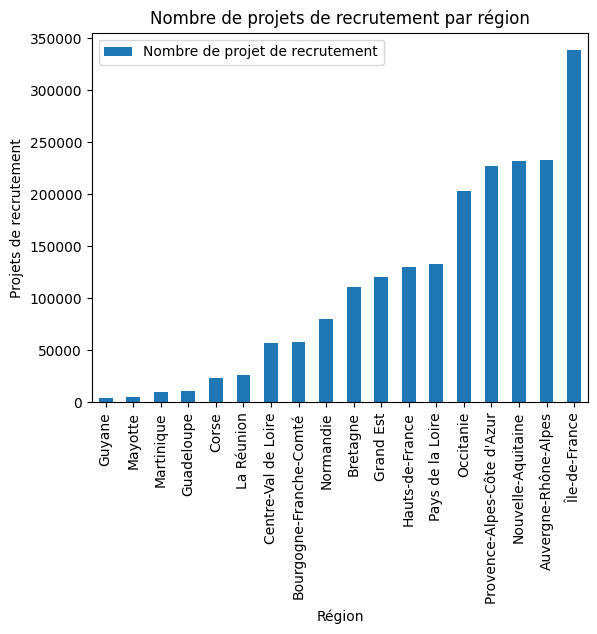

In [115]:
somme_par_region = somme_par_region.sort_values(by='Nombre de projet de recrutement')
somme_par_region.plot(kind='bar')
plt.xlabel('Région')
plt.ylabel('Projets de recrutement')
plt.title('Nombre de projets de recrutement par région')
plt.show()

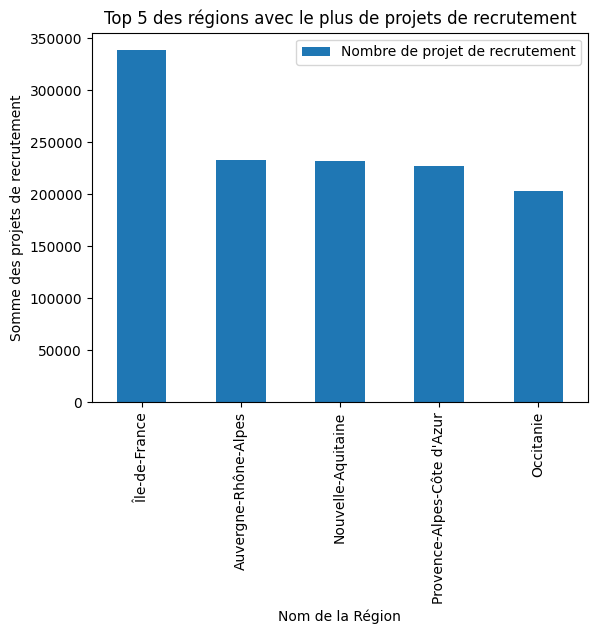

In [116]:
somme_par_region_asc = somme_par_region.sort_values(by='Nombre de projet de recrutement', ascending=False)
top_regions = somme_par_region_asc.head(5)

top_regions.plot(kind='bar')
plt.xlabel('Nom de la Région')
plt.ylabel('Somme des projets de recrutement')
plt.title('Top 5 des régions avec le plus de projets de recrutement')
plt.show()

                            Nombre de projet de recrutement
Nom de la Région                                           
Île-de-France                                        338189
Auvergne-Rhône-Alpes                                 232529
Nouvelle-Aquitaine                                   232077
Provence-Alpes-Côte d'Azur                           227105
Occitanie                                            203318
Pays de la Loire                                     133194
Hauts-de-France                                      130036
Grand Est                                            120430
Bretagne                                             111029
Normandie                                             79681
Bourgogne-Franche-Comté                               57672
Centre-Val de Loire                                   57068
La Réunion                                            25814
Corse                                                 23204
Guadeloupe                              

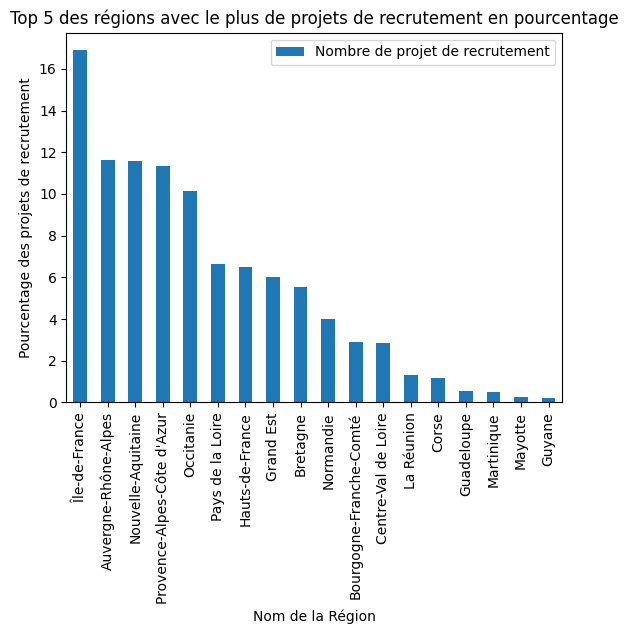

In [135]:
pourcentage_par_region = somme_par_region_asc / 2002597 * 100
print(somme_par_region_asc)
top_regions_pourc = pourcentage_par_region.head(30)

top_regions_pourc.plot(kind='bar')
plt.xlabel('Région')
plt.ylabel('Pourcentage des projets de recrutement')
plt.title('Top 30 des régions avec le plus de projets de recrutement en pourcentage')
plt.show()

In [146]:
columns_pr = ['Nom de la Région', 'Nombre de projet de recrutement', 'Nombre de projet de recrutement jugés difficile', 'Nombre de projet de recrutement saisonniers']
columns_pr_selected = new_data[columns_pr]

def to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

to_numeric(columns_pr_selected, 'Nombre de projet de recrutement')
to_numeric(columns_pr_selected, 'Nombre de projet de recrutement jugés difficile')
to_numeric(columns_pr_selected, 'Nombre de projet de recrutement saisonniers')

somme_par_region_selected = columns_pr_selected.groupby('Nom de la Région').sum()
print(somme_par_region_selected)


                            Nombre de projet de recrutement  \
Nom de la Région                                              
Auvergne-Rhône-Alpes                                 232529   
Bourgogne-Franche-Comté                               57672   
Bretagne                                             111029   
Centre-Val de Loire                                   57068   
Corse                                                 23204   
Grand Est                                            120430   
Guadeloupe                                            11004   
Guyane                                                 4655   
Hauts-de-France                                      130036   
La Réunion                                            25814   
Martinique                                            10015   
Mayotte                                                5577   
Normandie                                             79681   
Nouvelle-Aquitaine                                   23

/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/2845154493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/2845154493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/2845154493.py:5: SettingWithCopyWarning: 
A value is tr

In [148]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12190 entries, 0 to 50433
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Année                                            12190 non-null  int64 
 1   Code Métier BMO                                  12190 non-null  object
 2   Nom Métier BMO                                   12190 non-null  object
 3   Code Famille Métier                              12190 non-null  object
 4   Label Famille Métier                             12190 non-null  object
 5   Code bassin emploi                               12190 non-null  int64 
 6   Nom du bassin emploi                             12190 non-null  object
 7   Numero de Département                            12190 non-null  object
 8   Nom du Département                               12190 non-null  object
 9   code région INSEE                           

In [188]:
columns_metier = ['Nom Métier BMO','Nombre de projet de recrutement','Nombre de projet de recrutement jugés difficile', 'Nombre de projet de recrutement saisonniers']
columns_metier_selected = new_data[columns_metier]
columns_metier_selected.head(30)

def to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)

to_numeric(columns_metier_selected, 'Nombre de projet de recrutement')
to_numeric(columns_metier_selected, 'Nombre de projet de recrutement jugés difficile')
to_numeric(columns_metier_selected, 'Nombre de projet de recrutement saisonniers')


metier_bmo = columns_metier_selected.groupby('Nom Métier BMO').sum()
metier_bmo

/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/1346268598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/1346268598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/d_/lhs84_vd4pn1715g7dlkm4mm0000gn/T/ipykernel_14121/1346268598.py:6: SettingWithCopyWarning: 
A value is tr

,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
Nom Métier BMO,,,
Agents administratifs des transports,149,66,47
Agents administratifs divers,22913,9204,3863
Agents d'accueil et d'information,26240,13167,9896
Agents d'entretien de locaux,98522,54413,23072
Agents d'exploitation des transports,1666,825,496
...,...,...,...
"Viticulteurs, arboriculteurs salariés",115992,64983,107072
Vétérinaires,574,506,208
Écrivains,24,6,6


In [189]:
metier_bmo.head(30)

,Nombre de projet de recrutement,Nombre de projet de recrutement jugés difficile,Nombre de projet de recrutement saisonniers
Nom Métier BMO,,,
Agents administratifs des transports,149,66,47
Agents administratifs divers,22913,9204,3863
Agents d'accueil et d'information,26240,13167,9896
Agents d'entretien de locaux,98522,54413,23072
Agents d'exploitation des transports,1666,825,496
Agents de maîtrise en entretien,278,134,143
Agents de maîtrise et assimilés des industries de process,143,119,83
"Agents de maîtrise et assimilés en fabrication de matériel électrique, électronique",109,104,79
Agents de services hospitaliers,21070,12458,6156


In [175]:
nbr_p_diff = new_data['Nombre de projet de recrutement jugés difficile']
nbr_p_diff_int = pd.to_numeric(nbr_p_diff, errors='coerce').astype(int)
nbr_p_diff_sum = nbr_p_diff_int.sum()
print(nbr_p_diff_sum)

1222443


In [186]:
metier_bmo_pourc = metier_bmo / nbr_p_diff_sum * 100
metier_bmo_pourc.apply(lambda x: round(x, 2))

,Nombre de projet de recrutement jugés difficile
Nom Métier BMO,
Agents administratifs des transports,0.01
Agents administratifs divers,0.75
Agents d'accueil et d'information,1.08
Agents d'entretien de locaux,4.45
Agents d'exploitation des transports,0.07
...,...
"Viticulteurs, arboriculteurs salariés",5.32
Vétérinaires,0.04
Écrivains,0.00


In [187]:
# Trier les données par ordre décroissant
metier_bmo = metier_bmo.sort_values(by='Nombre de projet de recrutement jugés difficile', ascending=False)

# Sélectionner uniquement le top 20
top_20_metiers = metier_bmo.head(20)

# Créer le diagramme à barres
fig, ax = plt.subplots(figsize=(10, 6))
top_20_metiers.plot(kind='bar', ax=ax)
plt.xlabel('Nom Métier BMO')
plt.ylabel('Nombre de projets de recrutement jugés difficiles')
plt.title('Top 20 des métiers BMO avec le plus de projets de recrutement jugés difficiles')
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le diagramme à barres avec Streamlit
st.pyplot(fig)

DeltaGenerator()

Création de carte graphique

In [214]:
columns_map = ['Nom de la Région', 'Nombre de projet de recrutement jugés difficile']
columns_map_selected = new_data[columns_map]
columns_map_selected.head()
columns_map_selected[columns_map_selected['Nom de la Région'].str.contains('Auvergne-Rhône-Alpes')]


,Nom de la Région,Nombre de projet de recrutement jugés difficile
320,Auvergne-Rhône-Alpes,79
321,Auvergne-Rhône-Alpes,49
322,Auvergne-Rhône-Alpes,64
324,Auvergne-Rhône-Alpes,60
325,Auvergne-Rhône-Alpes,111
...,...,...
50403,Auvergne-Rhône-Alpes,89
50407,Auvergne-Rhône-Alpes,34
50408,Auvergne-Rhône-Alpes,26
50410,Auvergne-Rhône-Alpes,20


In [219]:
shapefile_path = '/Users/nelson/Desktop/BI/data/gadm41_FRA_shp'
france_shapefile = gpd.read_file(shapefile_path)
france_shapefile.head()
france_shapefile[france_shapefile['NAME_1'].str.contains('Auvergne-Rhône-Alpes')]

,GID_4,GID_0,COUNTRY,GID_1,NAME_1,GID_2,NAME_2,GID_3,NAME_3,NAME_4,VARNAME_4,TYPE_4,ENGTYPE_4,CC_4,geometry
0,FRA.1.1.1.1_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.1_1,Ain,FRA.1.1.1_1,Belley,Ambérieu-en-Bugey,NA,Canton,Canton,NA,"POLYGON ((5.36663 45.93637, 5.36207 45.93699, ..."
1,FRA.1.1.1.2_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.1_1,Ain,FRA.1.1.1_1,Belley,Belley,NA,Canton,Canton,NA,"POLYGON ((5.63637 45.61740, 5.63221 45.61149, ..."
2,FRA.1.1.1.3_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.1_1,Ain,FRA.1.1.1_1,Belley,Champagne-en-Valromey,NA,Canton,Canton,NA,"POLYGON ((5.74945 45.83547, 5.74124 45.84383, ..."
3,FRA.1.1.1.4_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.1_1,Ain,FRA.1.1.1_1,Belley,Hauteville-Lompnes,NA,Canton,Canton,NA,"POLYGON ((5.61292 45.85324, 5.59474 45.86286, ..."
4,FRA.1.1.1.5_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.1_1,Ain,FRA.1.1.1_1,Belley,Lagnieu,NA,Canton,Canton,NA,"POLYGON ((5.19102 45.77195, 5.18732 45.78102, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,FRA.1.12.3.2_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.12_1,Savoie,FRA.1.12.3_1,Saint-Jean-de-Maurienne,La Chambre,NA,Canton,Canton,NA,"POLYGON ((6.14124 45.29879, 6.15287 45.30363, ..."
474,FRA.1.12.3.3_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.12_1,Savoie,FRA.1.12.3_1,Saint-Jean-de-Maurienne,Lanslebourg-Mont-Cenis,NA,Canton,Canton,NA,"POLYGON ((6.94516 45.17303, 6.94144 45.17068, ..."
475,FRA.1.12.3.4_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.12_1,Savoie,FRA.1.12.3_1,Saint-Jean-de-Maurienne,Modane,NA,Canton,Canton,NA,"POLYGON ((6.58549 45.20317, 6.57747 45.21568, ..."
476,FRA.1.12.3.5_1,FRA,France,FRA.1_1,Auvergne-Rhône-Alpes,FRA.1.12_1,Savoie,FRA.1.12.3_1,Saint-Jean-de-Maurienne,Saint-Jean-de-Maurienne,NA,Canton,Canton,NA,"POLYGON ((6.22206 45.14259, 6.20781 45.15664, ..."


In [224]:
data_geo = columns_map_selected.merge(france_shapefile, left_on='Nom de la Région', right_on='NAME_1')
print(data_geo.head())

  Nom de la Région Nombre de projet de recrutement jugés difficile  \
0    Île-de-France                                              23   
1    Île-de-France                                              23   
2    Île-de-France                                              23   
3    Île-de-France                                              23   
4    Île-de-France                                              23   

           GID_4 GID_0 COUNTRY    GID_1         NAME_1      GID_2   NAME_2  \
0  FRA.8.1.1.1_1   FRA  France  FRA.8_1  Île-de-France  FRA.8.1_1  Essonne   
1  FRA.8.1.1.2_1   FRA  France  FRA.8_1  Île-de-France  FRA.8.1_1  Essonne   
2  FRA.8.1.1.3_1   FRA  France  FRA.8_1  Île-de-France  FRA.8.1_1  Essonne   
3  FRA.8.1.1.4_1   FRA  France  FRA.8_1  Île-de-France  FRA.8.1_1  Essonne   
4  FRA.8.1.1.5_1   FRA  France  FRA.8_1  Île-de-France  FRA.8.1_1  Essonne   

         GID_3   NAME_3          NAME_4 VARNAME_4  TYPE_4 ENGTYPE_4 CC_4  \
0  FRA.8.1.1_1  Étampes         Do

In [227]:
data_geo['Nombre de projet de recrutement jugés difficile'] = pd.to_numeric(data_geo['Nombre de projet de recrutement jugés difficile'], errors='coerce')

In [235]:
columns_selected_geo = ['Nom de la Région', 'Nombre de projet de recrutement jugés difficile', 'geometry']
data_geo_selected = data_geo[columns_selected_geo]
data_geo_selected



,Nom de la Région,Nombre de projet de recrutement jugés difficile,geometry
0,Île-de-France,23,"POLYGON ((1.92975 48.41162, 1.92589 48.41275, ..."
1,Île-de-France,23,"POLYGON ((2.33133 48.40769, 2.32533 48.40194, ..."
2,Île-de-France,23,"POLYGON ((2.19084 48.47404, 2.16159 48.47474, ..."
3,Île-de-France,23,"POLYGON ((2.35008 48.41639, 2.33985 48.41647, ..."
4,Île-de-France,23,"POLYGON ((1.97062 48.33999, 1.97562 48.35688, ..."
...,...,...,...
3887492,Corse,24,"POLYGON ((9.39191 42.40428, 9.41652 42.39901, ..."
3887493,Corse,24,"POLYGON ((9.25068 41.90332, 9.24942 41.90667, ..."
3887494,Corse,24,"POLYGON ((9.09211 42.11672, 9.08362 42.12475, ..."
3887495,Corse,24,"POLYGON ((9.53125 42.48320, 9.53149 42.48320, ..."


In [240]:
data_geo_selected_group = data_geo_selected.groupby('Nom de la Région').aggregate({'geometry': 'first', 'Nombre de projet de recrutement jugés difficile': 'sum'})
data_geo_selected_group

,geometry,Nombre de projet de recrutement jugés difficile
Nom de la Région,,
Auvergne-Rhône-Alpes,"POLYGON ((5.36663 45.93637, 5.36207 45.93699, ...",69387914
Bourgogne-Franche-Comté,"POLYGON ((4.56700 47.04327, 4.57039 47.03375, ...",9428388
Bretagne,"POLYGON ((-2.27334 48.26664, -2.27279 48.24207...",13531694
Centre-Val de Loire,"POLYGON ((2.60854 46.93736, 2.60201 46.94600, ...",7315455
Corse,"MULTIPOLYGON (((8.59847 41.88264, 8.59847 41.8...",678282
Grand Est,"POLYGON ((4.74377 49.77039, 4.72965 49.78439, ...",24699915
Hauts-de-France,"POLYGON ((3.45690 48.85754, 3.45223 48.85630, ...",20340606
Normandie,"POLYGON ((-0.75154 49.16213, -0.75847 49.15006...",13908393
Nouvelle-Aquitaine,"POLYGON ((0.15922 45.66291, 0.17082 45.65931, ...",79550185


In [243]:
# Convertir le DataFrame en GeoDataFrame
gdf = gpd.GeoDataFrame(data_geo_selected_group, geometry='geometry')

# Créer une couche de carte avec la colonne "geometry"
layer = pdk.Layer(
    "GeoJsonLayer",
    data=gdf.__geo_interface__,
    opacity=0.8,
    stroked=False,
    filled=True,
    extruded=False,
    get_fill_color=[255, 0, 0],  # Couleur de remplissage
    pickable=True
)

# Créer la carte Pydeck
view_state = pdk.ViewState(
    latitude=48.8566,  # Latitude centrale
    longitude=2.3522,  # Longitude centrale
    zoom=6,  # Niveau de zoom
    pitch=0,  # Angle de vue
    bearing=0  # Orientation de la carte
)

# Afficher la carte Pydeck dans Streamlit
st.pydeck_chart(pdk.Deck(layers=[layer], initial_view_state=view_state))


DeltaGenerator()